In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('canretail.csv',
                 skiprows=6, skipfooter=9,
                 engine='python')
df.head()

,Adjustments,Unadjusted,Seasonally adjusted
0,Jan-1991,12588862,15026890
1,Feb-1991,12154321,15304585
2,Mar-1991,14337072,15413591
3,Apr-1991,15108570,15293409
4,May-1991,17225734,15676083


In [3]:
from pandas.tseries.offsets import MonthEnd

In [4]:
# to create time series data. we use pandas date type instead of string
df['Adjustments'] = pd.to_datetime(df['Adjustments']) + MonthEnd(1)
df = df.set_index('Adjustments')
df.head()

,Unadjusted,Seasonally adjusted
Adjustments,,
1991-01-31,12588862,15026890
1991-02-28,12154321,15304585
1991-03-31,14337072,15413591
1991-04-30,15108570,15293409
1991-05-31,17225734,15676083


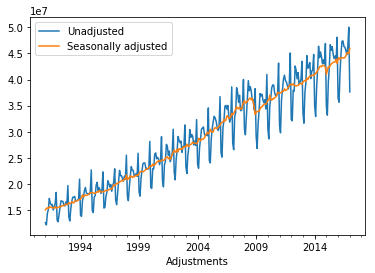

In [5]:
df.plot()

In [6]:
split_date = pd.Timestamp('01-01-2011')

In [7]:
train = df.loc[:split_date, ['Unadjusted']]
test = df.loc[split_date:, ['Unadjusted']]

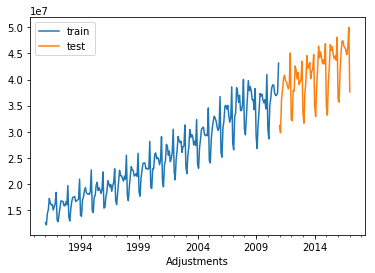

In [8]:
ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test'])

In [9]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

# why do we normalize the data independently?
# use used to normalize before splitting...
train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [10]:
# given h, predict h+1
train_sc[:4]

array([[0.01402033],
       [0.        ],
       [0.0704258 ],
       [0.09531795]])

In [11]:
X_train = train_sc[:-1]
y_train = train_sc[1:]

X_test = test_sc[:-1]
y_test = test_sc[1:]

# Let's try an MLP

In [12]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping

/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/anaconda2/lib/python2.7/site-packages/cryptography/hazmat/primitives/constant_time.py:26: CryptographyDeprecationWarning: Support for your Python version is deprecated. The next version of cryptography will remove support. Please upgrade to a 2.7.x release that supports hmac.compare_digest as soon as possible.
  utils.DeprecatedIn23,


In [13]:
K.clear_session()

model = Sequential()
model.add(Dense(12, input_dim=1, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                24        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 13        
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [14]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)


In [15]:
model.fit(X_train, y_train, epochs=200,
          batch_size=2, verbose=1,
          callbacks=[early_stop])

Epoch 1/200
239/239 [==============================] - 1s 3ms/step - loss: 0.1556
Epoch 2/200
239/239 [==============================] - 0s 724us/step - loss: 0.0435
Epoch 3/200
239/239 [==============================] - 0s 820us/step - loss: 0.0265
Epoch 4/200
239/239 [==============================] - 0s 665us/step - loss: 0.0240
Epoch 5/200
239/239 [==============================] - 0s 636us/step - loss: 0.0215
Epoch 6/200
239/239 [==============================] - 0s 589us/step - loss: 0.0195
Epoch 7/200
239/239 [==============================] - 0s 585us/step - loss: 0.0176
Epoch 8/200
239/239 [==============================] - 0s 612us/step - loss: 0.0157
Epoch 9/200
239/239 [==============================] - 0s 622us/step - loss: 0.0143
Epoch 10/200
239/239 [==============================] - 0s 627us/step - loss: 0.0130
Epoch 11/200
239/239 [==============================] - 0s 599us/step - loss: 0.0122
Epoch 12/200
239/239 [==============================] - 0s 684us/step - loss

In [16]:
y_pred = model.predict(X_test)


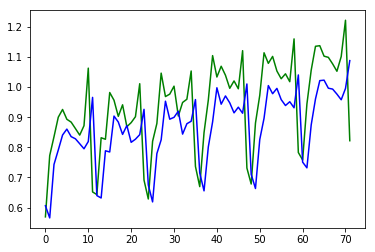

In [17]:
plt.plot(y_test, color='g') # real
plt.plot(y_pred, color='b') # predicted
# predicts the previous value, and actually not well
# its just saying, when my number is x, what should my output be?

# RNN

In [18]:
from keras.layers import LSTM


In [19]:
X_train.shape


(239, 1)

In [20]:
#3D tensor with shape (batch_size, timesteps, input_dim)
X_train[:, None].shape

(239, 1, 1)

In [21]:
X_train_t = X_train[:, None]
X_test_t = X_test[:, None]

In [22]:
K.clear_session()
model = Sequential()

model.add(LSTM(6, input_shape=(1, 1)))

model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

In [23]:
model.fit(X_train_t, y_train,
          epochs=100, batch_size=1, verbose=1,
          callbacks=[early_stop])

Epoch 1/100
239/239 [==============================] - 3s 12ms/step - loss: 0.1301
Epoch 2/100
239/239 [==============================] - 1s 3ms/step - loss: 0.0439
Epoch 3/100
239/239 [==============================] - 1s 4ms/step - loss: 0.0345
Epoch 4/100
239/239 [==============================] - 1s 4ms/step - loss: 0.0277
Epoch 5/100
239/239 [==============================] - 1s 4ms/step - loss: 0.0225
Epoch 6/100
239/239 [==============================] - 1s 4ms/step - loss: 0.0179
Epoch 7/100
239/239 [==============================] - 1s 4ms/step - loss: 0.0144
Epoch 8/100
239/239 [==============================] - 1s 4ms/step - loss: 0.0122
Epoch 9/100
239/239 [==============================] - 1s 4ms/step - loss: 0.0110
Epoch 10/100
239/239 [==============================] - 1s 4ms/step - loss: 0.0105
Epoch 11/100
239/239 [==============================] - 1s 4ms/step - loss: 0.0102
Epoch 12/100
239/239 [==============================] - 1s 4ms/step - loss: 0.0102
Epoch 00012:

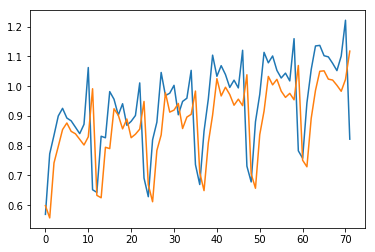

In [24]:
# its actually not better!
# recalls the last values a bit better, but still no overlap
y_pred = model.predict(X_test_t)
plt.plot(y_test)
plt.plot(y_pred)

# With Window

In [25]:
train_sc.shape


(240, 1)

In [26]:
train_sc_df = pd.DataFrame(train_sc, columns=['Scaled'], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['Scaled'], index=test.index)
train_sc_df.head()


,Scaled
Adjustments,
1991-01-31,0.014020
1991-02-28,0.000000
1991-03-31,0.070426
1991-04-30,0.095318
1991-05-31,0.163628


In [27]:
for s in range(1, 13):
    train_sc_df['shift_{}'.format(s)] = train_sc_df['Scaled'].shift(s)
    test_sc_df['shift_{}'.format(s)] = test_sc_df['Scaled'].shift(s)

In [28]:
# same data but we shift the data down by 1 at each column
train_sc_df.head(13)


,Scaled,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
Adjustments,,,,,,,,,,,,,
1991-01-31,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-02-28,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-03-31,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-04-30,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-05-31,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-06-30,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-07-31,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN
1991-08-31,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN
1991-09-30,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN


In [29]:
X_train = train_sc_df.dropna().drop('Scaled', axis=1)
y_train = train_sc_df.dropna()[['Scaled']]

X_test = test_sc_df.dropna().drop('Scaled', axis=1)
y_test = test_sc_df.dropna()[['Scaled']]

In [30]:
X_train.head()


,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
Adjustments,,,,,,,,,,,,
1992-01-31,0.200913,0.131738,0.111395,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020
1992-02-29,0.030027,0.200913,0.131738,0.111395,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000
1992-03-31,0.019993,0.030027,0.200913,0.131738,0.111395,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426
1992-04-30,0.065964,0.019993,0.030027,0.200913,0.131738,0.111395,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318
1992-05-31,0.109831,0.065964,0.019993,0.030027,0.200913,0.131738,0.111395,0.092309,0.126174,0.123958,0.135141,0.163628


In [31]:
X_train.shape


(228, 12)

In [32]:
X_train = X_train.values
X_test= X_test.values

y_train = y_train.values
y_test = y_test.values

## MLP with Window

In [33]:
K.clear_session()

model = Sequential()
model.add(Dense(16, input_dim=12, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                208       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.fit(X_train, y_train, epochs=200,
          batch_size=1, verbose=1, callbacks=[early_stop])


Epoch 1/200
228/228 [==============================] - 1s 3ms/step - loss: 0.0122
Epoch 2/200
228/228 [==============================] - 0s 1ms/step - loss: 0.0078
Epoch 3/200
228/228 [==============================] - 0s 1ms/step - loss: 0.0046
Epoch 4/200
228/228 [==============================] - 0s 1ms/step - loss: 0.0039
Epoch 5/200
228/228 [==============================] - 0s 1ms/step - loss: 0.0033
Epoch 6/200
228/228 [==============================] - 0s 1ms/step - loss: 0.0029
Epoch 7/200
228/228 [==============================] - 0s 1ms/step - loss: 0.0024
Epoch 8/200
228/228 [==============================] - 0s 1ms/step - loss: 0.0022
Epoch 9/200
228/228 [==============================] - 0s 1ms/step - loss: 0.0020
Epoch 10/200
228/228 [==============================] - 0s 1ms/step - loss: 0.0020
Epoch 00010: early stopping


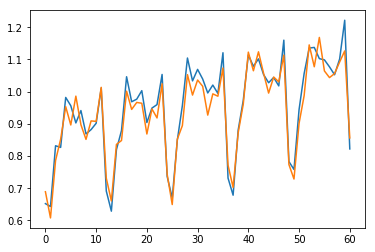

In [35]:

y_pred = model.predict(X_test)
plt.plot(y_test)
plt.plot(y_pred)

# RNN

In [40]:
# this is passing 12 months all at once, later we will do something better
X_train_t = X_train.reshape(X_train.shape[0], 1, 12)
X_test_t = X_test.reshape(X_test.shape[0], 1, 12)

In [41]:
X_train_t.shape

(228, 1, 12)

In [42]:

K.clear_session()
model = Sequential()

model.add(LSTM(6, input_shape=(1, 12)))

model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

In [43]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 6)                 456       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 463
Trainable params: 463
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.fit(X_train_t, y_train, epochs=100,
          batch_size=1, verbose=1, callbacks=[early_stop])

Epoch 1/100
228/228 [==============================] - 3s 11ms/step - loss: 0.0205
Epoch 2/100
228/228 [==============================] - 1s 4ms/step - loss: 0.0066
Epoch 3/100
228/228 [==============================] - 1s 4ms/step - loss: 0.0059
Epoch 4/100
228/228 [==============================] - 1s 4ms/step - loss: 0.0051
Epoch 5/100
228/228 [==============================] - 1s 4ms/step - loss: 0.0047
Epoch 6/100
228/228 [==============================] - 1s 4ms/step - loss: 0.0041
Epoch 7/100
228/228 [==============================] - 1s 4ms/step - loss: 0.0039
Epoch 8/100
228/228 [==============================] - 1s 4ms/step - loss: 0.0033
Epoch 9/100
228/228 [==============================] - 1s 4ms/step - loss: 0.0031
Epoch 10/100
228/228 [==============================] - 1s 4ms/step - loss: 0.0027
Epoch 11/100
228/228 [==============================] - 1s 4ms/step - loss: 0.0025
Epoch 12/100
228/228 [==============================] - 1s 4ms/step - loss: 0.0023
Epoch 13/100

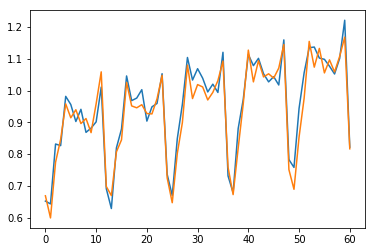

In [45]:
y_pred = model.predict(X_test_t)
plt.plot(y_test)
plt.plot(y_pred)